In [ ]:
import pandas as pd
import numpy as np
url = 'https://raw.githubusercontent.com/jbrownlee/Datasets/master/haberman.csv'
list_cols = ['Age', "Patient's Years", "N_positive_ax", "survival_status"]
df = pd.read_csv(url, names=list_cols)

In [ ]:
df.head()

,Age,Patient's Years,N_positive_ax,survival_status
0,30,64,1,1
1,30,62,3,1
2,30,65,0,1
3,31,59,2,1
4,31,65,4,1


In [ ]:
dataset.describe()


,Age,Year operation,Axillary nodes detected,Survival status
count,306.000000,306.000000,306.000000,306.000000
mean,52.457516,62.852941,4.026144,1.264706
std,10.803452,3.249405,7.189654,0.441899
min,30.000000,58.000000,0.000000,1.000000
25%,44.000000,60.000000,0.000000,1.000000
50%,52.000000,63.000000,1.000000,1.000000
75%,60.750000,65.750000,4.000000,2.000000
max,83.000000,69.000000,52.000000,2.000000


In [ ]:
df['survival_status'].value_counts()

1    225
2     81
Name: survival_status, dtype: int64

In [ ]:
X = df.drop(['survival_status'], axis=1)
y = df['survival_status']

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=21, stratify=y)

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score,cross_validate
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
model_lr = LogisticRegression()
cv_score = cross_val_score(model_lr, X,y, scoring='roc_auc', cv=5)
cv_score.mean()

0.6942483660130719

In [ ]:
model_lr.fit(X_train, y_train)
y_pred = model_lr.predict(X_test)



In [ ]:
confusion_matrix(y_test, y_pred, labels=[1,2])

array([[52,  5],
       [17,  3]])

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       0.75      0.91      0.83        57
           2       0.38      0.15      0.21        20

    accuracy                           0.71        77
   macro avg       0.56      0.53      0.52        77
weighted avg       0.66      0.71      0.67        77



In [ ]:
TP = 52
TN = 3
FP = 17
FN = 5

In [ ]:
precision = TP/(TP+FP)
precision

0.7536231884057971

In [ ]:
recall = TP/(TP+FN)
recall

0.9122807017543859

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
model_knn =  KNeighborsClassifier()
param_grid = {'n_neighbors':np.arange(5,50), 'weights':['distance','uniform']}
gscv= GridSearchCV(model_knn,param_grid=param_grid, scoring='roc_auc', cv=5)




In [ ]:
gscv.fit(X,y)

GridSearchCV(cv=5, error_score=nan,
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             iid='deprecated', n_jobs=None,
             param_grid={'n_neighbors': array([ 5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21,
       22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38,
       39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49]),
                         'weights': ['distance', 'uniform']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='roc_auc', verbose=0)

In [ ]:
gscv.best_params_

{'n_neighbors': 40, 'weights': 'uniform'}

In [ ]:
gscv.best_score_

0.7151062091503269

In [ ]:
gscv.predict_proba(X_test)

array([[0.725, 0.275],
       [0.725, 0.275],
       [0.65 , 0.35 ],
       [0.5  , 0.5  ],
       [0.7  , 0.3  ],
       [0.825, 0.175],
       [0.8  , 0.2  ],
       [0.8  , 0.2  ],
       [0.75 , 0.25 ],
       [0.7  , 0.3  ],
       [0.375, 0.625],
       [0.875, 0.125],
       [0.75 , 0.25 ],
       [0.85 , 0.15 ],
       [0.85 , 0.15 ],
       [0.925, 0.075],
       [0.8  , 0.2  ],
       [0.75 , 0.25 ],
       [0.775, 0.225],
       [0.475, 0.525],
       [0.875, 0.125],
       [0.85 , 0.15 ],
       [0.85 , 0.15 ],
       [0.375, 0.625],
       [0.875, 0.125],
       [0.925, 0.075],
       [0.85 , 0.15 ],
       [0.875, 0.125],
       [0.9  , 0.1  ],
       [0.825, 0.175],
       [0.9  , 0.1  ],
       [0.425, 0.575],
       [0.8  , 0.2  ],
       [0.8  , 0.2  ],
       [0.475, 0.525],
       [0.8  , 0.2  ],
       [0.85 , 0.15 ],
       [0.8  , 0.2  ],
       [0.875, 0.125],
       [0.8  , 0.2  ],
       [0.5  , 0.5  ],
       [0.85 , 0.15 ],
       [0.75 , 0.25 ],
       [0.5

In [ ]:
gscv.classes_
gscv.predict_proba(X_test)[:,1]

array([0.275, 0.275, 0.35 , 0.5  , 0.3  , 0.175, 0.2  , 0.2  , 0.25 ,
       0.3  , 0.625, 0.125, 0.25 , 0.15 , 0.15 , 0.075, 0.2  , 0.25 ,
       0.225, 0.525, 0.125, 0.15 , 0.15 , 0.625, 0.125, 0.075, 0.15 ,
       0.125, 0.1  , 0.175, 0.1  , 0.575, 0.2  , 0.2  , 0.525, 0.2  ,
       0.15 , 0.2  , 0.125, 0.2  , 0.5  , 0.15 , 0.25 , 0.45 , 0.2  ,
       0.075, 0.2  , 0.1  , 0.125, 0.6  , 0.2  , 0.6  , 0.125, 0.225,
       0.15 , 0.15 , 0.15 , 0.5  , 0.175, 0.625, 0.55 , 0.15 , 0.25 ,
       0.15 , 0.25 , 0.25 , 0.225, 0.25 , 0.35 , 0.075, 0.275, 0.125,
       0.25 , 0.575, 0.25 , 0.15 , 0.6  ])

In [ ]:
cv_score_1 = cross_validate(model_knn, X,y, scoring='roc_auc', cv=5, return_train_score=True)
cv_score_2 = cross_val_score(model_knn, X,y, scoring='roc_auc')
cv_score_1

{'fit_time': array([0.00178933, 0.00149298, 0.00140858, 0.00152278, 0.0014174 ]),
 'score_time': array([0.00316191, 0.00225234, 0.0022471 , 0.00215507, 0.00214934]),
 'test_score': array([0.72679739, 0.58263889, 0.69097222, 0.73055556, 0.50555556]),
 'train_score': array([0.84878472, 0.87991453, 0.84192308, 0.84444444, 0.85923077])}

In [ ]:
def knn_pred(k):
  model = KNeighborsClassifier(n_neighbors=k)
  score = cross_validate(model, X,y, cv=10, return_train_score=True)
  train_score = score['train_score'].mean()
  test_score = score['test_score'].mean()
  return train_score, test_score

In [ ]:
train_scores = []
test_scores = []

for k in range(2,100):
  train_score, test_score = knn_pred(k)
  train_scores.append(train_score)
  test_scores.append(test_score)

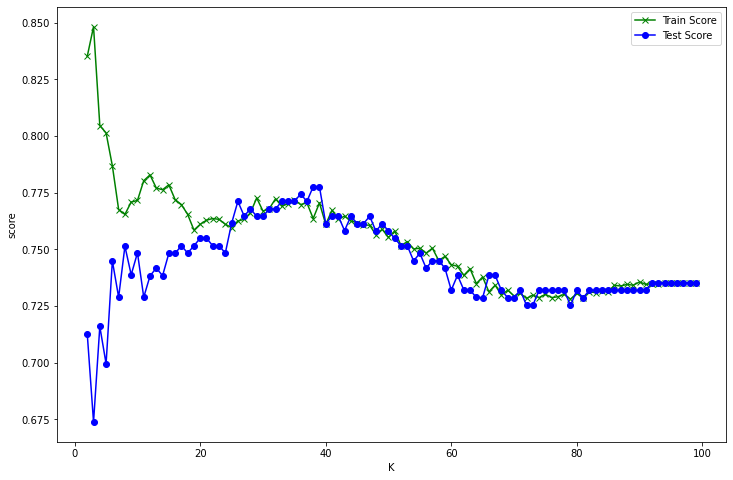

In [ ]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(12,8))

ax.plot(range(2,100), train_scores, marker='x', label='Train Score', color='g')
ax.plot(range(2,100), test_scores, marker='o', label='Test Score', c='b')

ax.set_xlabel('K')
ax.set_ylabel('score')

plt.legend()
plt.show()

In [ ]:
#decision tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import RandomizedSearchCV
model_dt = DecisionTreeClassifier()
param_grid = {'splitter':['best','random'], 'criterion':['gini','entropy']}
rscv= RandomizedSearchCV(model_dt,param_distributions=param_grid,n_iter=100,scoring='roc_auc')




/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_search.py:281: UserWarning: The total space of parameters 4 is smaller than n_iter=100. Running 4 iterations. For exhaustive searches, use GridSearchCV.
  % (grid_size, self.n_iter, grid_size), UserWarning)


RandomizedSearchCV(cv=None, error_score=nan,
                   estimator=DecisionTreeClassifier(ccp_alpha=0.0,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features=None,
                                                    max_leaf_nodes=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
                                                    presort='deprecated',
                                                    random_state=None,
       

In [ ]:
rscv.fit(X,y)

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_search.py:281: UserWarning: The total space of parameters 4 is smaller than n_iter=100. Running 4 iterations. For exhaustive searches, use GridSearchCV.
  % (grid_size, self.n_iter, grid_size), UserWarning)


RandomizedSearchCV(cv=None, error_score=nan,
                   estimator=DecisionTreeClassifier(ccp_alpha=0.0,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features=None,
                                                    max_leaf_nodes=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
                                                    presort='deprecated',
                                                    random_state=None,
       

In [ ]:
rscv.best_params_

{'criterion': 'gini', 'splitter': 'random'}

In [ ]:
rscv.predict_proba(X_test)

array([[0. , 1. ],
       [1. , 0. ],
       [1. , 0. ],
       [0. , 1. ],
       [0.5, 0.5],
       [0. , 1. ],
       [0. , 1. ],
       [1. , 0. ],
       [0. , 1. ],
       [0.5, 0.5],
       [1. , 0. ],
       [1. , 0. ],
       [0. , 1. ],
       [1. , 0. ],
       [0.5, 0.5],
       [1. , 0. ],
       [1. , 0. ],
       [1. , 0. ],
       [0.5, 0.5],
       [1. , 0. ],
       [1. , 0. ],
       [0.5, 0.5],
       [1. , 0. ],
       [1. , 0. ],
       [1. , 0. ],
       [0. , 1. ],
       [1. , 0. ],
       [1. , 0. ],
       [1. , 0. ],
       [1. , 0. ],
       [1. , 0. ],
       [1. , 0. ],
       [1. , 0. ],
       [1. , 0. ],
       [1. , 0. ],
       [1. , 0. ],
       [1. , 0. ],
       [1. , 0. ],
       [1. , 0. ],
       [1. , 0. ],
       [0. , 1. ],
       [1. , 0. ],
       [1. , 0. ],
       [1. , 0. ],
       [1. , 0. ],
       [1. , 0. ],
       [1. , 0. ],
       [1. , 0. ],
       [1. , 0. ],
       [1. , 0. ],
       [0. , 1. ],
       [0. , 1. ],
       [1. ,

In [ ]:
rscv.classes_
rscv.predict_proba(X_test)[:,1]

array([1. , 0. , 0. , 1. , 0.5, 1. , 1. , 0. , 1. , 0.5, 0. , 0. , 1. ,
       0. , 0.5, 0. , 0. , 0. , 0.5, 0. , 0. , 0.5, 0. , 0. , 0. , 1. ,
       0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. ,
       0. , 1. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 1. , 1. ,
       0. , 0. , 0. , 0. , 0. , 1. , 0. , 1. , 1. , 0. , 0. , 0. , 0. ,
       0. , 0. , 0. , 0. , 0. , 1. , 0. , 0.5, 1. , 0. , 0. , 1. ])

In [ ]:
cv_score_1_ = cross_validate(model_dt, X,y, scoring='roc_auc', cv=5, return_train_score=True)
cv_score_2_ = cross_val_score(model_dt, X,y, scoring='roc_auc')
cv_score_1_

{'fit_time': array([0.00402331, 0.00182247, 0.00181937, 0.0017128 , 0.00162721]),
 'score_time': array([0.00367284, 0.00169897, 0.00174212, 0.00159311, 0.00163698]),
 'test_score': array([0.53529412, 0.37430556, 0.56111111, 0.47361111, 0.55      ]),
 'train_score': array([0.99891493, 0.99931624, 0.99893162, 0.99893162, 0.99931624])}